In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Reading the data
df=pd.read_csv("winequality-red (1).csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#feature and target selection
X=df.iloc[:,:-1] #feature
y=df.iloc[:,-1] #target

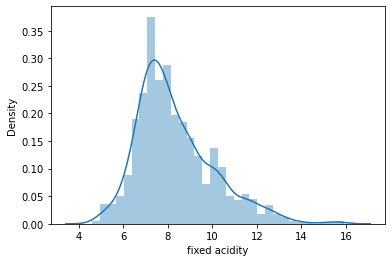

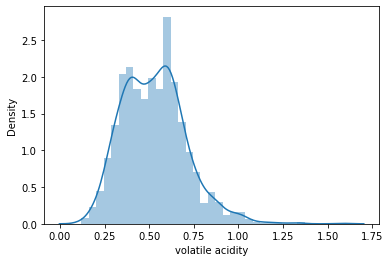

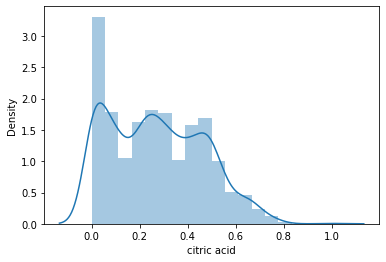

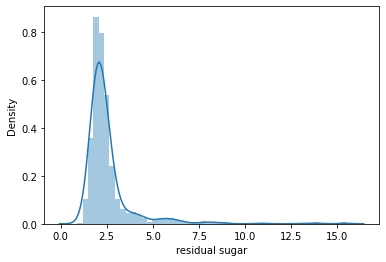

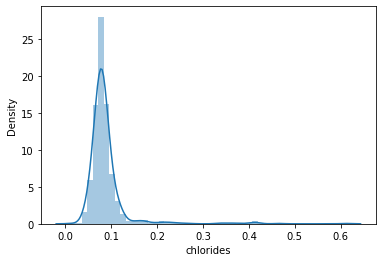

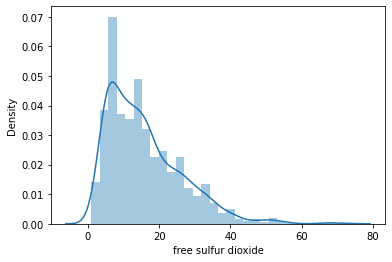

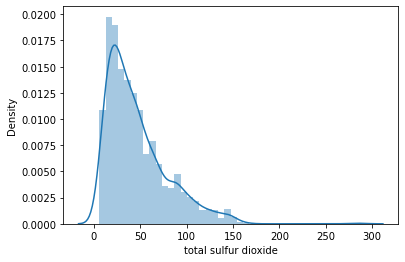

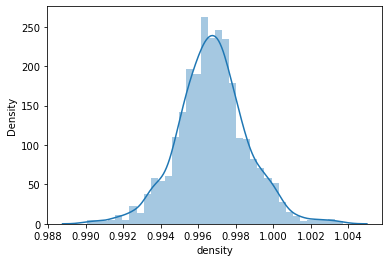

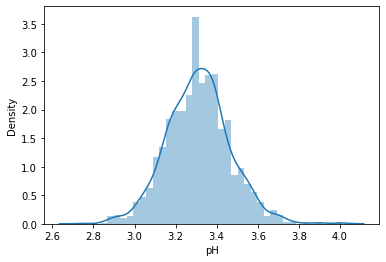

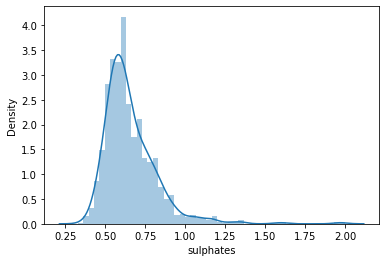

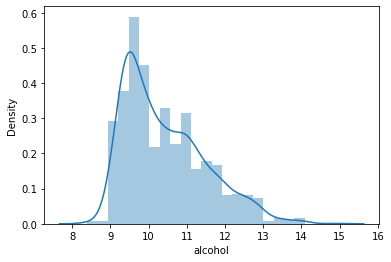

In [8]:
#feature and target relation and outlier
for col in X:
    plt.figure()
    sns.distplot(X[col])
    plt.show()

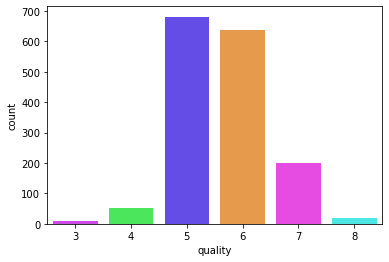

In [9]:
#visualizing target column
plt.figure()
sns.countplot(y,palette=['#E033FF','#33FF49','#5233FF','#FF9C33','#FF33F9','#33FFFC'])
plt.show()

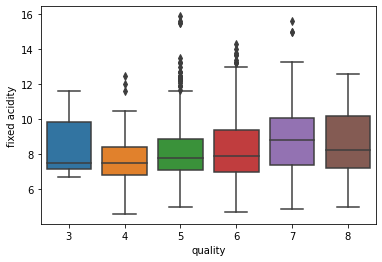

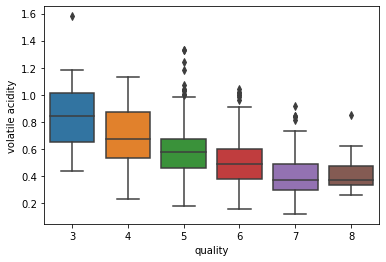

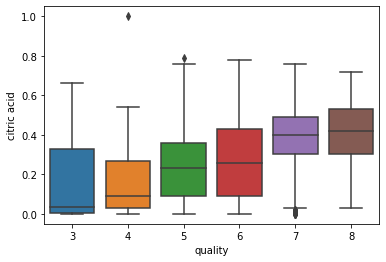

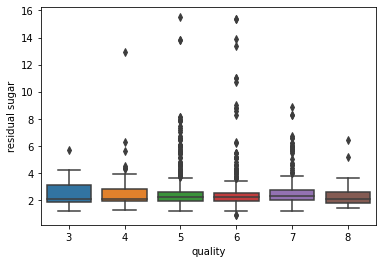

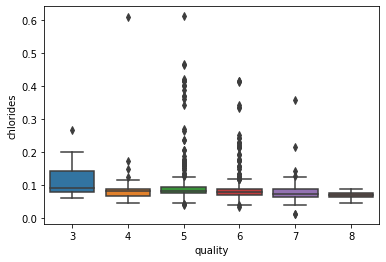

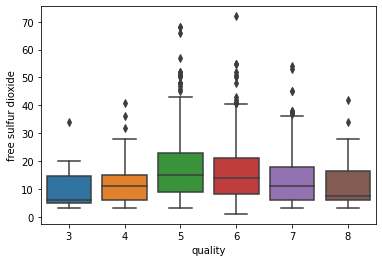

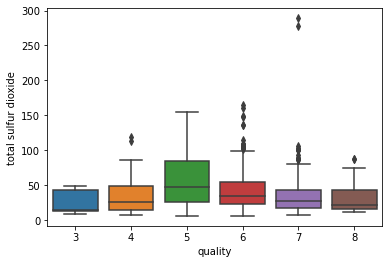

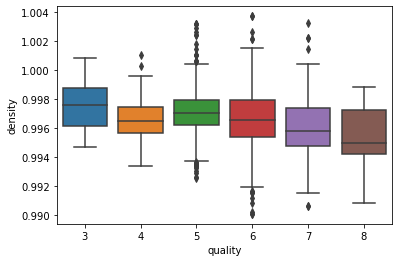

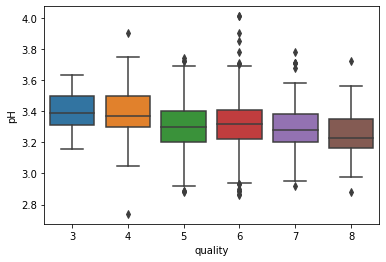

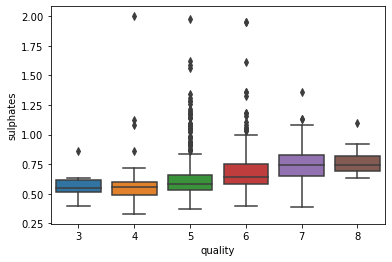

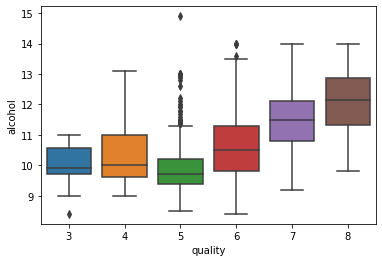

In [10]:
#Boxplot
for col in X:
    plt.figure()
    sns.boxplot(data=df,x='quality',y=col)
    plt.show()

In [11]:
#multi colinearity
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [12]:
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


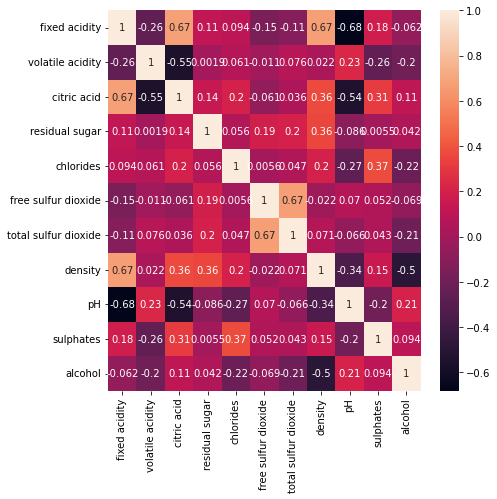

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(X.corr(),annot=True)
plt.show()

In [14]:
#train test split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
#Decision tree model
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [16]:
#testing model with train data score
model.score(xtrain,ytrain)

1.0

In [17]:
#testing the model on testing data
y_pred=model.predict(xtest)
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.05      0.05        21
           5       0.68      0.69      0.68       207
           6       0.62      0.58      0.60       195
           7       0.47      0.60      0.53        52
           8       0.25      0.33      0.29         3

    accuracy                           0.60       480
   macro avg       0.35      0.37      0.36       480
weighted avg       0.60      0.60      0.60       480



In [18]:
#entropy
model1=DecisionTreeClassifier(criterion='entropy')

In [19]:
#training model
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [20]:
#testing model
ypred1=model1.predict(xtest)
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.08      0.05      0.06        21
           5       0.71      0.72      0.72       207
           6       0.57      0.53      0.55       195
           7       0.35      0.46      0.40        52
           8       0.33      0.33      0.33         3

    accuracy                           0.58       480
   macro avg       0.34      0.35      0.34       480
weighted avg       0.58      0.58      0.58       480



In [22]:
#Depth of model1
model1.get_depth()

18

In [28]:
#creating a model with reduced depth
model2=DecisionTreeClassifier(max_depth=8)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=8)

In [29]:
#predicting o/p
ypred=model2.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.10      0.17        21
           5       0.63      0.75      0.68       207
           6       0.61      0.57      0.59       195
           7       0.50      0.46      0.48        52
           8       0.00      0.00      0.00         3

    accuracy                           0.61       480
   macro avg       0.46      0.31      0.32       480
weighted avg       0.62      0.61      0.59       480



# Random Forest model

In [30]:
#RF classifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf=RandomForestClassifier(n_estimators=70,max_depth=15,max_features=8)
#n_estimators:no of decision trees

In [38]:
#training model
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=15, max_features=8, n_estimators=70)

In [39]:
#testing model
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.05      0.09        21
           5       0.70      0.81      0.75       207
           6       0.67      0.65      0.66       195
           7       0.54      0.52      0.53        52
           8       0.50      0.33      0.40         3

    accuracy                           0.67       480
   macro avg       0.57      0.39      0.40       480
weighted avg       0.68      0.67      0.65       480



In [40]:
#converting multi class data to binary class data
#creating a new column called binary quality
#If quality is > 5 we make it 1, if quality<5 we make it 0
def multi_to_binary(n):
    if n>5:
        return 1
    else:
        return 0

In [42]:
multi_to_binary(6)

1

In [44]:
df['quality_bin']=df['quality'].apply(multi_to_binary)

In [50]:
#feature target selection
X=df.drop(['quality','quality_bin'],axis=1) #feature
y=df['quality_bin']

In [51]:
#train test split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [60]:
#RF model and training same
rf=RandomForestClassifier(n_estimators=75)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=75)

In [61]:
#testing
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       230
           1       0.84      0.79      0.81       250

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480

